# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

%matplotlib inline

In [2]:
# load messages dataset
messages_raw = pd.read_csv('disaster_messages.csv')
messages_raw

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct
6,15,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct


In [3]:
#Rename columns and remove duplicates for messages data
messages = messages_raw.rename(index=str, columns={'id':'message_id'})
messages = messages.drop_duplicates()
messages

,message_id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct
6,15,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct


In [4]:
diff_msgs_same_id = messages.groupby('message_id').agg(lambda x: len(x)).message.reset_index().query('message > 1')
diff_msgs_same_id

,message_id,message


As we can see, there are no cases of different messages with the same id.

In [5]:
# load categories dataset and remove duplicates
categories_raw = pd.read_csv('disaster_categories.csv').drop_duplicates()
categories_raw

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...
5,14,related-0;request-0;offer-0;aid_related-0;medi...
6,15,related-1;request-0;offer-0;aid_related-0;medi...
7,16,related-1;request-1;offer-0;aid_related-1;medi...
8,17,related-0;request-0;offer-0;aid_related-0;medi...
9,18,related-1;request-1;offer-0;aid_related-1;medi...


In [6]:
#Rename columns and remove duplicates for categories data
categories = categories_raw.rename(index=str, columns={'id':'message_id'})
categories = categories.drop_duplicates()
categories

,message_id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...
5,14,related-0;request-0;offer-0;aid_related-0;medi...
6,15,related-1;request-0;offer-0;aid_related-0;medi...
7,16,related-1;request-1;offer-0;aid_related-1;medi...
8,17,related-0;request-0;offer-0;aid_related-0;medi...
9,18,related-1;request-1;offer-0;aid_related-1;medi...


In [7]:
duplicated_msg_cats = categories.groupby('message_id').agg(lambda x: len(x)).reset_index().query('categories > 1')
print(duplicated_msg_cats.shape)
duplicated_msg_cats

(36, 2)


,message_id,categories
162,202,2
707,862,2
1404,1652,2
2818,3250,2
3366,3882,2
4331,4956,2
4511,5153,2
5057,5776,2
5590,6393,2
5679,6492,2


In [8]:
duplicated_cats_case = categories[categories['message_id'] == 27768]['categories'].tolist()
cats_1 = set(duplicated_cats_case[0].split(';'))
cats_2 = set(duplicated_cats_case[1].split(';'))

In [9]:
print(cats_1.difference(cats_2))
print(cats_2.difference(cats_1))

{'aid_related-1', 'military-1'}
{'military-0', 'aid_related-0'}


As we can see, there are 36 messages with the same id but different category assignments. The correct assignment could be done manually but would be subject to human error as there is no specialist for consultation. Thus, I decided to drop such messages from the dataset.

In [10]:
#Remove messages with duplicated category assignments from messages data
print(messages.shape)
messages = messages[~messages['message_id'].isin(duplicated_msg_cats['message_id'])]
print(messages.shape)
messages

(26180, 4)
(26144, 4)


,message_id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct
6,15,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct


In [11]:
#Remove messages with duplicated category assignments from categories data
print(categories.shape)
categories = categories[~categories['message_id'].isin(duplicated_msg_cats['message_id'])]
print(categories.shape)
categories

(26216, 2)
(26144, 2)


,message_id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...
5,14,related-0;request-0;offer-0;aid_related-0;medi...
6,15,related-1;request-0;offer-0;aid_related-0;medi...
7,16,related-1;request-1;offer-0;aid_related-1;medi...
8,17,related-0;request-0;offer-0;aid_related-0;medi...
9,18,related-1;request-1;offer-0;aid_related-1;medi...


### 2. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [12]:
# create a dataframe of the 36 individual category columns
categories_wide = categories.categories.str.split(';', expand=True)
categories_wide.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [13]:
# select the first row of the categories dataframe
row = categories_wide.head(1)
# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = row.apply(lambda x: x.str.slice(stop=-2)).values[0].tolist()
print(category_colnames)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [14]:
# rename the columns of `categories`
categories_wide.columns = category_colnames
categories_wide.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 3. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [15]:
for column in category_colnames:
    # set each value to be the last character of the string
    categories_wide[column] = categories_wide[column].apply(lambda x: x[-1])
    
    # convert column from string to numeric
    categories_wide[column] = categories_wide[column].astype(int)
categories_wide

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
categories_wide.sum()

related                   20218
request                    4453
offer                       118
aid_related               10822
medical_help               2078
medical_products           1310
search_and_rescue           723
security                    471
military                    857
child_alone                   0
water                      1666
food                       2911
shelter                    2303
clothing                    403
money                       602
missing_people              298
refugees                    873
death                      1190
other_aid                  3434
infrastructure_related     1701
transport                  1196
buildings                  1327
electricity                 532
tools                       159
hospitals                   283
shops                       120
aid_centers                 309
other_infrastructure       1147
weather_related            7272
floods                     2142
storm                      2437
fire    

As we can see above, the child_alone class has no representation within our dataset, so we will exclude it from the analysis.

In [17]:
categories_wide = categories_wide.drop('child_alone', axis=1)

In [18]:
categories_wide[categories_wide > 1].sum()

related                   374.0
request                     0.0
offer                       0.0
aid_related                 0.0
medical_help                0.0
medical_products            0.0
search_and_rescue           0.0
security                    0.0
military                    0.0
water                       0.0
food                        0.0
shelter                     0.0
clothing                    0.0
money                       0.0
missing_people              0.0
refugees                    0.0
death                       0.0
other_aid                   0.0
infrastructure_related      0.0
transport                   0.0
buildings                   0.0
electricity                 0.0
tools                       0.0
hospitals                   0.0
shops                       0.0
aid_centers                 0.0
other_infrastructure        0.0
weather_related             0.0
floods                      0.0
storm                       0.0
fire                        0.0
earthqua

In [19]:
categories_wide['related'] = categories_wide['related'].apply(lambda x: x if x < 2 else 1)

In [20]:
categories_wide[categories_wide > 1].sum()

related                   0.0
request                   0.0
offer                     0.0
aid_related               0.0
medical_help              0.0
medical_products          0.0
search_and_rescue         0.0
security                  0.0
military                  0.0
water                     0.0
food                      0.0
shelter                   0.0
clothing                  0.0
money                     0.0
missing_people            0.0
refugees                  0.0
death                     0.0
other_aid                 0.0
infrastructure_related    0.0
transport                 0.0
buildings                 0.0
electricity               0.0
tools                     0.0
hospitals                 0.0
shops                     0.0
aid_centers               0.0
other_infrastructure      0.0
weather_related           0.0
floods                    0.0
storm                     0.0
fire                      0.0
earthquake                0.0
cold                      0.0
other_weat

### 4. Create `categories_wide` and `categories_long` DataFrame for better data processing.

In [21]:
categories_wide = pd.concat([categories.message_id,categories_wide], axis=1)
categories_wide

,message_id,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7,16,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,18,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
categories_wide[categories_wide.aid_related > 1]

,message_id,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report


In [23]:
categories_long = pd.melt(categories_wide, id_vars=['message_id'], var_name='category')
categories_long = categories_long[categories_long['value'] == 1].drop('value', axis=1)
categories_long

,message_id,category
0,2,related
1,7,related
2,8,related
3,9,related
4,12,related
6,15,related
7,16,related
9,18,related
10,20,related
12,22,related


### 2. Merge datasets, creating `messages_wide` and `messages_long` dataframes
- Merge the messages and categories datasets using the common id

In [24]:
messages_wide = pd.merge(messages, categories_wide, on='message_id')
messages_wide

,message_id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [25]:
messages_long = pd.merge(messages, categories_long, on='message_id')
messages_long

,message_id,message,original,genre,category
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related
2,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,aid_related
3,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,other_aid
4,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,weather_related
5,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,storm
6,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related
7,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related
8,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,request
9,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,aid_related


### 7. Perform Some Data Exploration

#### Messages Per Genre

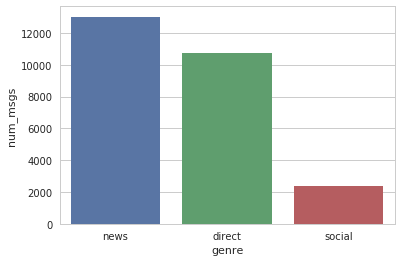

In [26]:
messages_per_genre = messages_wide.genre.value_counts().rename_axis('genre').reset_index(name='num_msgs')
sns.set(style="whitegrid")
sns.barplot(x="genre", y="num_msgs", data=messages_per_genre);

#### Messages Per Category

In [27]:
num_msgs_per_cat = messages_long.category.value_counts().rename_axis('category').reset_index(name='num_msgs')
num_msgs_per_cat

,category,num_msgs
0,related,20031
1,aid_related,10822
2,weather_related,7272
3,direct_report,5055
4,request,4453
5,other_aid,3434
6,food,2911
7,earthquake,2449
8,storm,2437
9,shelter,2303


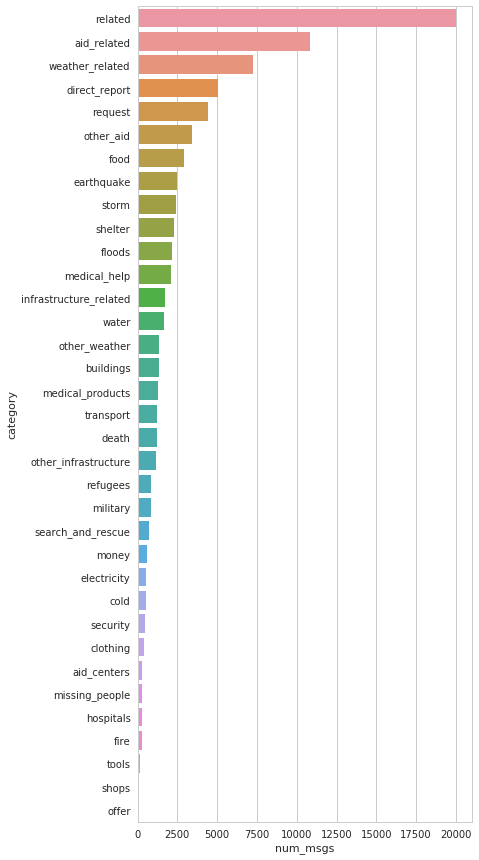

In [28]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="num_msgs", y="category", data=num_msgs_per_cat);

#### Num. Words Per Message

In [29]:
num_words_dist = messages.message.apply(lambda x: len(x.split())).to_frame(name='num_words')
num_words_dist

,num_words
0,13
1,9
2,6
3,13
4,12
5,5
6,6
7,12
8,9
9,22


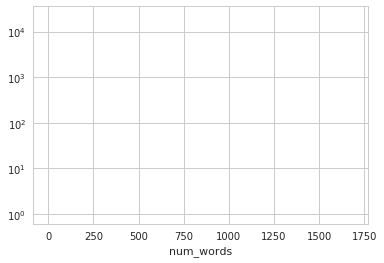

In [30]:
p = sns.distplot(num_words_dist.num_words, kde=False)
p.axes.set_yscale('log');

As we can see in the plot above, the word count has a right skewed distribution, with the majority of the messages has very few words, and there are a couple of messages with a large number of words. Let's examine some of these.

In [31]:
messages_with_size = pd.concat([messages, num_words_dist], axis=1)
messages_with_size

,message_id,message,original,genre,num_words
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,13
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,9
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,6
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,13
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,12
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct,5
6,15,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,6
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct,12
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct,9
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,22


In [32]:
messages_with_size[messages_with_size['num_words'] > 500]

,message_id,message,original,genre,num_words
13690,16295,"Prior to this disaster, we experienced devasta...",NaN,news,627
13883,16508,"One year ago, when a catastrophic earthquake h...",NaN,news,995
14724,17430,"My youngest son, who is six, has severe stomac...",NaN,news,663
14751,17460,"We are seeing very intense, torrential showers...",NaN,news,540
15141,17889,The peak for dengue cases is generally during ...,NaN,news,805
15851,18667,Houses have been completely buried under loess...,NaN,news,647
15932,18758,"Since 22 November 2008, there has been 719.4 m...",NaN,news,759
16055,18894,The weather forecast indicates that rains shou...,NaN,news,1683
16158,19006,We are also striving to boost the capacity of ...,NaN,news,539
16858,19788,The country has been devestated by two decades...,NaN,news,670


In [33]:
messages.message.iloc[15982]

"The weather forecast indicates that rains should go on until at least late December. The severe drought parching east Africa has left 10 million facing hunger and the scope of one of the world's worst unfolding humanitarian disasters conjured up memories of Ethiopia's devastating 1984 famine. Seismologists agree that Padang will face more earthquakes in future, and warn that a much larger quake with far greater destructive force is inevitable in the region. The flash floods that followed torrential monsoonal rains in north-west Pakistan between 28 and 30 July have caused great loss of life and wide-spread damage to infrastructure, livestock and property in more than 100 villages. Lesotho and Swaziland would also experience scattered rains, he noted. But while floodwaters have subsided in some areas, there has been fresh flooding in the north of the state and more heavy rainfall forecast elsewhere. Approximately 1.9 million people have been affected in the past week by heavy torrential

As we see above, the messages with more than 500 words are all part of the news genre, as the example shown above.

#### Num. Words Per Category

In [34]:
def count_words(messages):
    num_words_per_message = messages.apply(lambda x: len(x.split(' ')))
    return num_words_per_message.median()

word_counts_by_category = messages_long.groupby('category').message.agg(lambda x: count_words(x)).reset_index(name='num_words')
word_counts_by_category

,category,num_words
0,aid_centers,26.0
1,aid_related,24.0
2,buildings,26.0
3,clothing,24.0
4,cold,26.0
5,death,28.0
6,direct_report,20.0
7,earthquake,20.0
8,electricity,24.0
9,fire,26.0


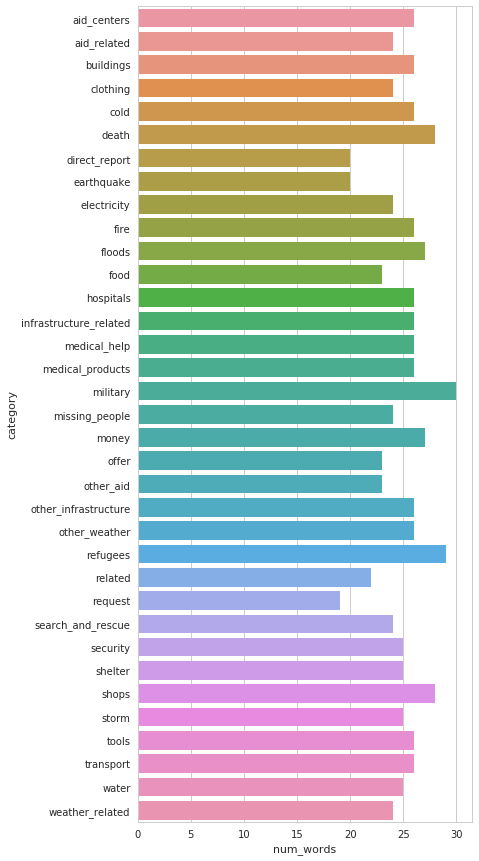

In [35]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="num_words", y="category", data=word_counts_by_category);

As we can see in the above plot, the number of words in a message per category does not vary much (ranging from around 18-30 words), with requests, direct_report and earthquake being the categories with the shorter messages, and military and refugees the ones with longer messages.

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

##### Prepare Messages Table

In [36]:
messages.head()

,message_id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [37]:
messages_with_size

,message_id,message,original,genre,num_words
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,13
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,9
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,6
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,13
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,12
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct,5
6,15,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,6
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct,12
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct,9
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,22


In [38]:
messages_final = messages_with_size
messages_final

,message_id,message,original,genre,num_words
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,13
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,9
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,6
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,13
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,12
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct,5
6,15,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,6
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct,12
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct,9
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,22


##### Prepare Categories Table

In [39]:
categories_final = categories_long.category.drop_duplicates().reset_index().drop('index', axis=1) \
                    .merge(num_msgs_per_cat, on='category') \
                    .merge(word_counts_by_category, on='category')
categories_final

,category,num_msgs,num_words
0,related,20031,22.0
1,request,4453,19.0
2,offer,118,23.0
3,aid_related,10822,24.0
4,medical_help,2078,26.0
5,medical_products,1310,26.0
6,search_and_rescue,723,24.0
7,security,471,25.0
8,military,857,30.0
9,water,1666,25.0


##### Prepare Genres Table

In [40]:
genres_final = messages.genre.drop_duplicates().reset_index().drop('index', axis=1) \
                    .merge(messages_per_genre, on='genre')

genres_final

,genre,num_msgs
0,direct,10728
1,social,2392
2,news,13024


##### Prepare Messages Categories Wide

In [41]:
corpus_wide = messages.merge(categories_wide, on='message_id')
corpus_wide

,message_id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [42]:
message_categories = categories_long.rename(index=str, columns={'id':'message_id'})
message_categories

,message_id,category
0,2,related
1,7,related
2,8,related
3,9,related
4,12,related
6,15,related
7,16,related
9,18,related
10,20,related
12,22,related


In [43]:
engine = create_engine('sqlite:///DisasterResponse.db')
messages_final.to_sql('Message', engine, index=False, if_exists='replace')
categories_final.to_sql('Category', engine, index=False, if_exists='replace')
genres_final.to_sql('Genre', engine, index=False, if_exists='replace')
corpus_wide.to_sql('CorpusWide', engine, index=False, if_exists='replace')
message_categories.to_sql('MessageCategoryLong', engine, index=False, if_exists='replace')

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.